# Workshop #4


Welcome to workshop #4! In this workshop, we will continue to go over ML models that can be useful in classification problems. We'll be going over how to use Decision Trees and Random Forests. We'll also talk about different ways to evaluate a model's performance.

Lets jump in!

### Decision Trees

Decision trees are likely one of the easiest ML techniques to understand. 

Let's say you had to guess the name of a celebrity, and you're allowed to ask as many questions as you want. How would you do this?

Are they a male? (Yes)

Are they currently an actor? (No)

Are they from the USA? (No)

Do they have a beard (Yes)

Are they a musician? (Yes)

Are they a singer? (Yes)

Is Harsh a huge fan? (YES)

Any guesses on who it could be? Run the next cell to find out!

In [ ]:
from IPython.display import Image
img_url = "https://m.buro247.me/images/thesource.com_.jpg"

Image(url=img_url)

And to all you haters out there, yes, Drake CAN sing.

OK, so how does this apply to ML? Well, let's notice a few things about the activity we just did. We started off with a big pool of potential celebrities to choose from. Every question helped us to definitively narrow down our list, till we were left with only one at the end. Furthermore, every question had a clear binary answer. We didn't ask a question that had a subjective answer, such as "Are they a good artist?". Using these yes or no questions, we are able to arrive at the conclusion.

So what exactly is a decision tree? In a decision tree, we simply ask a series of conclusions to reach an answer. Here is an example of a simple decision tree that I'm going to be using to buy a car in the future (if I was rich)

In [ ]:
img_url = "https://www.researchgate.net/profile/Avashlin_Moodley/publication/311614501/figure/fig2/AS:439104304357377@1481702033140/An-example-of-a-simple-decision-tree.png"
Image(url=img_url)

As the image shows, I have a series of questions in mind on whether or not I buy the car. I follow a simple criteria that takes me down different sides of the tree in different situations to help me reach a conclusion.

Now let's say we change up the question and bring it back to our titanic dataset. Given enough questions about a particular person, could we likely determine whether or not they survived the shipwreck? If we asked the right questions, we probably could! A decision tree in ML is essentially the process of having the computer generate the right questions on its own so it can decide, simply by asking a few questions, whether or not a particular person survived. 

Let's go ahead and code this up! As usual Scikit Learn makes this nice and easy for us:

Start off my importing our data:

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/uclaacmai/ML_Practical/master/cleaned_titanic_data.csv"

titanic_data = pd.read_csv(url)
titanic_data.drop(titanic_data.columns[0], inplace=True, axis = 1)
print(titanic_data)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  port_Q  port_S
0           0       3    0  22.0      1      0   7.2500       0       1
1           1       1    1  38.0      1      0  71.2833       0       0
2           1       3    1  26.0      0      0   7.9250       0       1
3           1       1    1  35.0      1      0  53.1000       0       1
4           0       3    0  35.0      0      0   8.0500       0       1
..        ...     ...  ...   ...    ...    ...      ...     ...     ...
884         0       2    0  27.0      0      0  13.0000       0       1
885         1       1    1  19.0      0      0  30.0000       0       1
886         0       3    1  28.0      1      2  23.4500       0       1
887         1       1    0  26.0      0      0  30.0000       0       0
888         0       3    0  32.0      0      0   7.7500       1       0

[889 rows x 9 columns]


And now we split our data into train and test groups:

In [ ]:
from sklearn.model_selection import train_test_split

labels = titanic_data['Survived']
features = titanic_data.drop(columns = ['Survived'])

features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,port_Q,port_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,port_Q,port_S
707,1,1,22.0,0,0,151.5500,0,1
239,3,1,28.0,1,0,14.4542,0,0
381,3,0,32.0,0,0,7.9250,0,1
791,3,1,28.0,8,2,69.5500,0,1
682,3,0,14.0,5,2,46.9000,0,1


Let's verify that the train/test split actually worked:

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(titanic_data.shape)
print(len(x_train) + len(x_test))

(711, 8)
(178, 8)
(711,)
(178,)
(889, 9)
889


Summing the number of elements in the train and test dataframes gives us the total number of elements in the original dataframe, so our split worked!

Now for the fun part! Here's how to easily build a decision tree using SciKit Learn:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

tree_model = DecisionTreeClassifier().fit(x_train, y_train)
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Wow! That was easy. Shoutout scikit learn for making our lives simple. Okay so how do we know this was any good? Well, as a baseline, let's check the accuracy on the train and test sets.

Print the training accuracy!

In [ ]:
tree_model.score(x_train, y_train)

0.9845288326300985

Print the testing accuracy!

In [ ]:
tree_model.score(x_test, y_test)

0.7415730337078652

Looks like our model is performing well on the train set, but not as well on the test set. Let's take a look at what questions the model is asking in order to make its decision. We can visualize the questions the tree is asking 

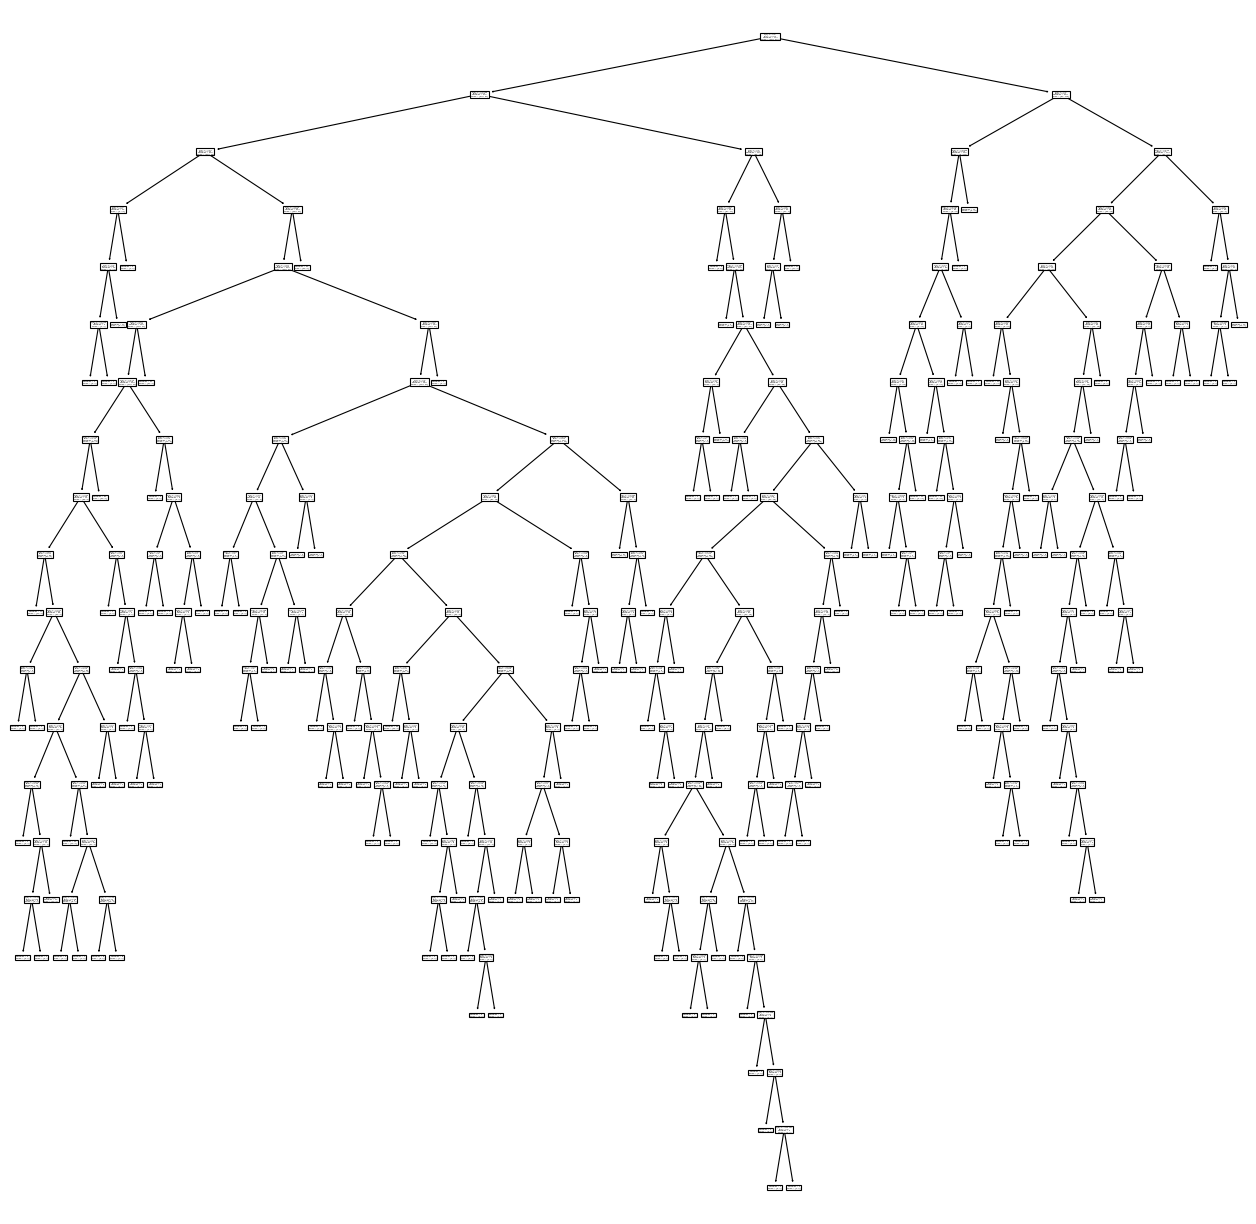

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

plot_tree(tree_model)
plt.show()

Woah! What happened here? Our decision tree here is enormous! This is likely bad news. Having a tree this big means that we are asking way too many questions, and are unable to generalize our conclusions from our data in our model. This large decision tree is a clear indication that our model is __overfitting__! Another indication of this was our model's test accuracy being significantly lower than our train accuracy.

Any ideas what overfitting is?

So how do we tackle this overfitting in our decision tree? 

There are a couple of approaches to this problem. At the core of all of these approaches however, is the idea that we want to restrict the growth of the tree. Let's look at some ways to do this.

We can restrict the number of questions the model is allowed to ask. We can control this number by using the max_depth parameter in the DecisionTreeClassifier Model

Train accuracy: 0.8227848101265823
Test accuracy: 0.8202247191011236


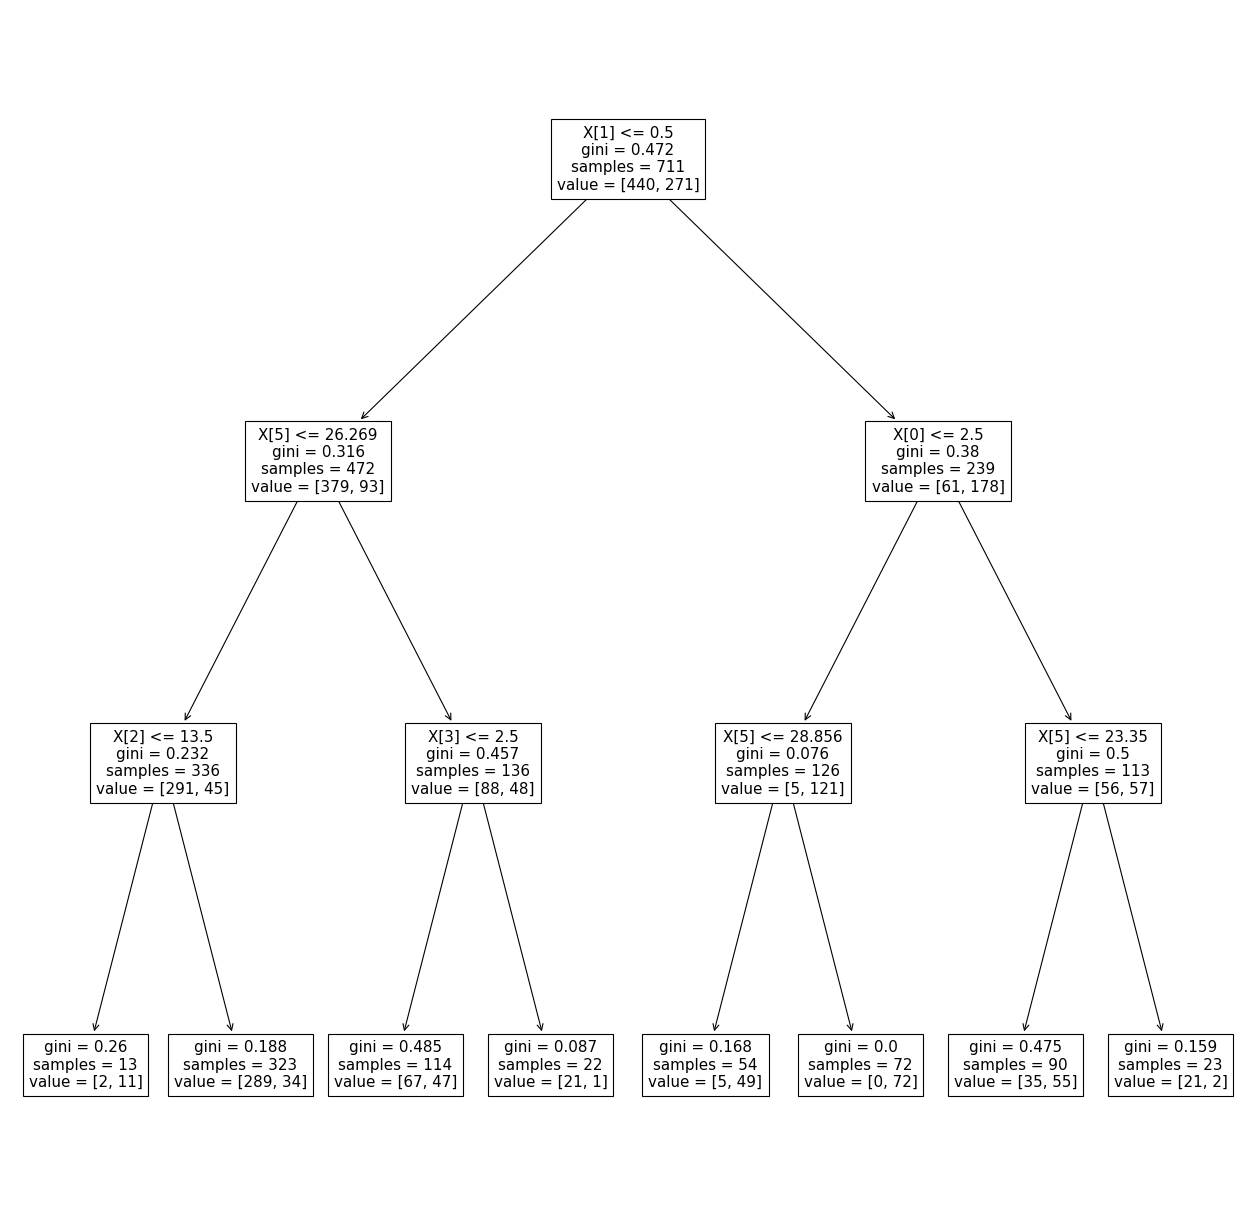

In [ ]:
tree_model = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

print("Train accuracy: " + str(tree_model.score(x_train, y_train)))
print("Test accuracy: " + str(tree_model.score(x_test, y_test)))
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

           
plot_tree(tree_model)
plt.show()

Looks like our tree size went down! Unfortunately, our accuracy cratered along with it. 

Let's take a slight detour. Now that our tree is much smaller, we can take a closer look at the labels in the decision tree to get more clarity on what exactly the model is doing. The boxes clearly show the questions the model is asking. For example, in the first split, the model asks: does the first feature (which is sex) have a value less than 0.5? If the answer is yes, we continue to the left side of the decision tree. If the answer is no, we move down the right side of the tree. We ask questions like these all the way down the tree.

One interesting paramter to look at is the gini value provided in each box. The gini impurity value tells us the probablity that a sample would be misclassified if we randomly assigned a label at that point. Essentially, the gini value tells us how important the decision we are making is. The higher the ginin value, the more clarity asking that specific question gives us.

Discuss: Would it be better to remove a branch with gini 0.5 or better to remove a branch with gini 0.05?

We can tell our model to stop splitting if we get a smaller gini value for a certain node:

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


Train accuracy: 0.810126582278481
Test accuracy: 0.8089887640449438


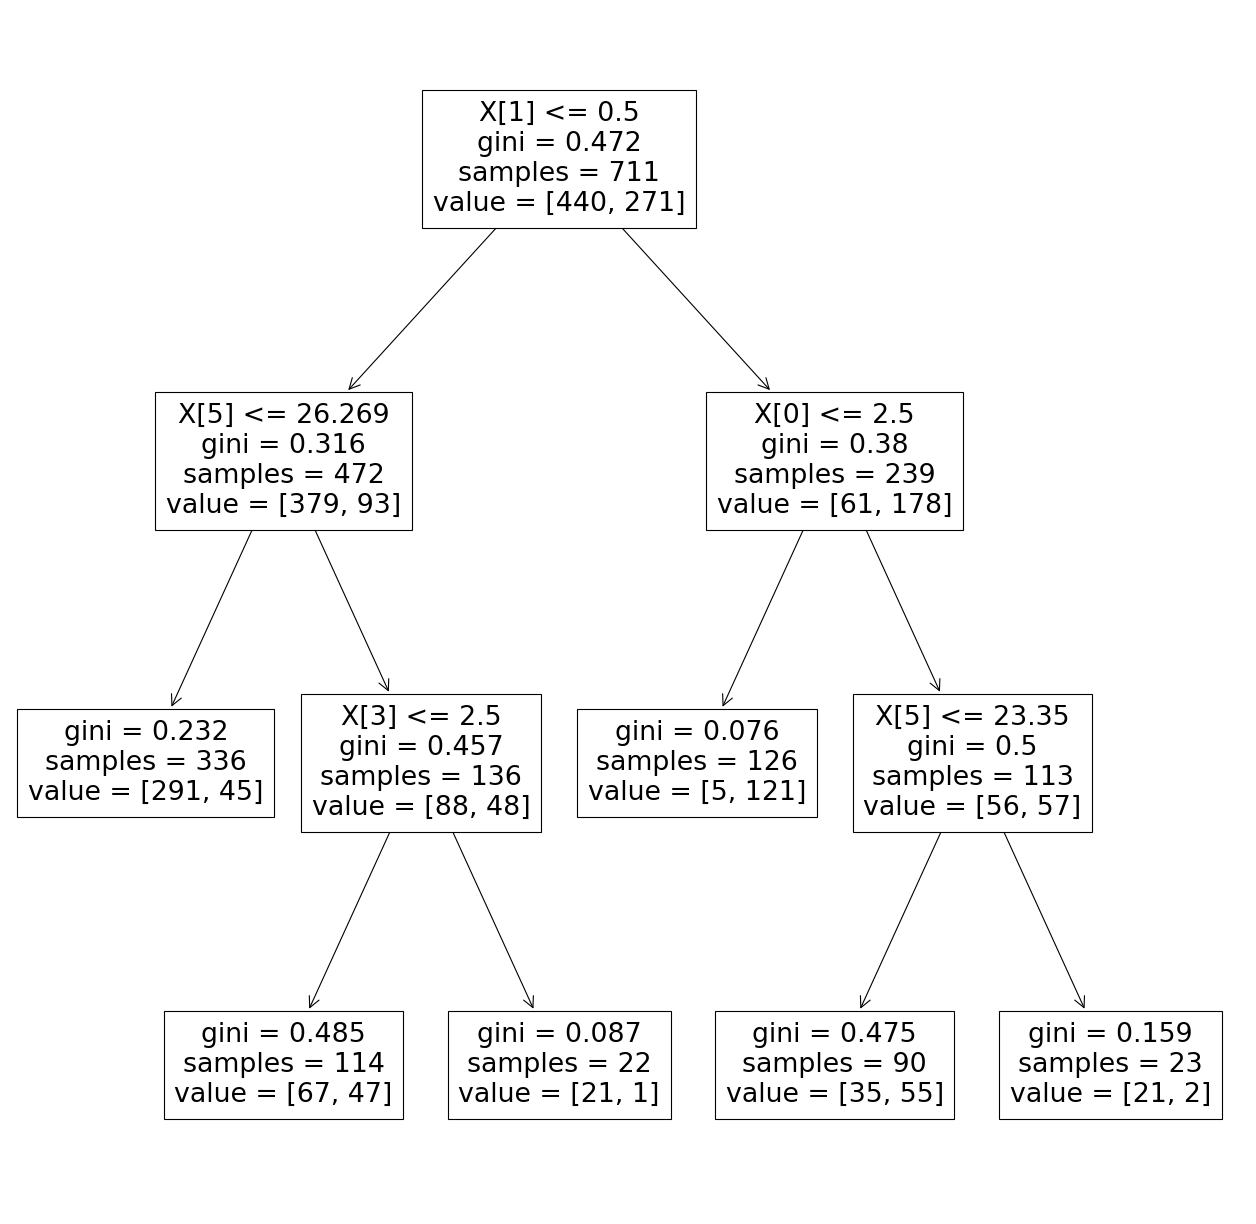

In [ ]:
tree_model = DecisionTreeClassifier(max_depth = 3, min_impurity_split = 0.3).fit(x_train, y_train)

print("Train accuracy: " + str(tree_model.score(x_train, y_train)))
print("Test accuracy: " + str(tree_model.score(x_test, y_test)))
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

           
plot_tree(tree_model)
plt.show()

Take a look at the differences between the previous two decision trees. It is clear that in our second decision tree, we stop splitting early at the min gini value.

Another way to mitigate the overfitting problem is to set a minimum number of samples needed at a box in order to be split further. This would stop our tree from dividing samples into very small sized groups.

Try implementing a Decision Tree with a limit on the number of samples below!

Train accuracy: 0.7960618846694796
Test accuracy: 0.8089887640449438


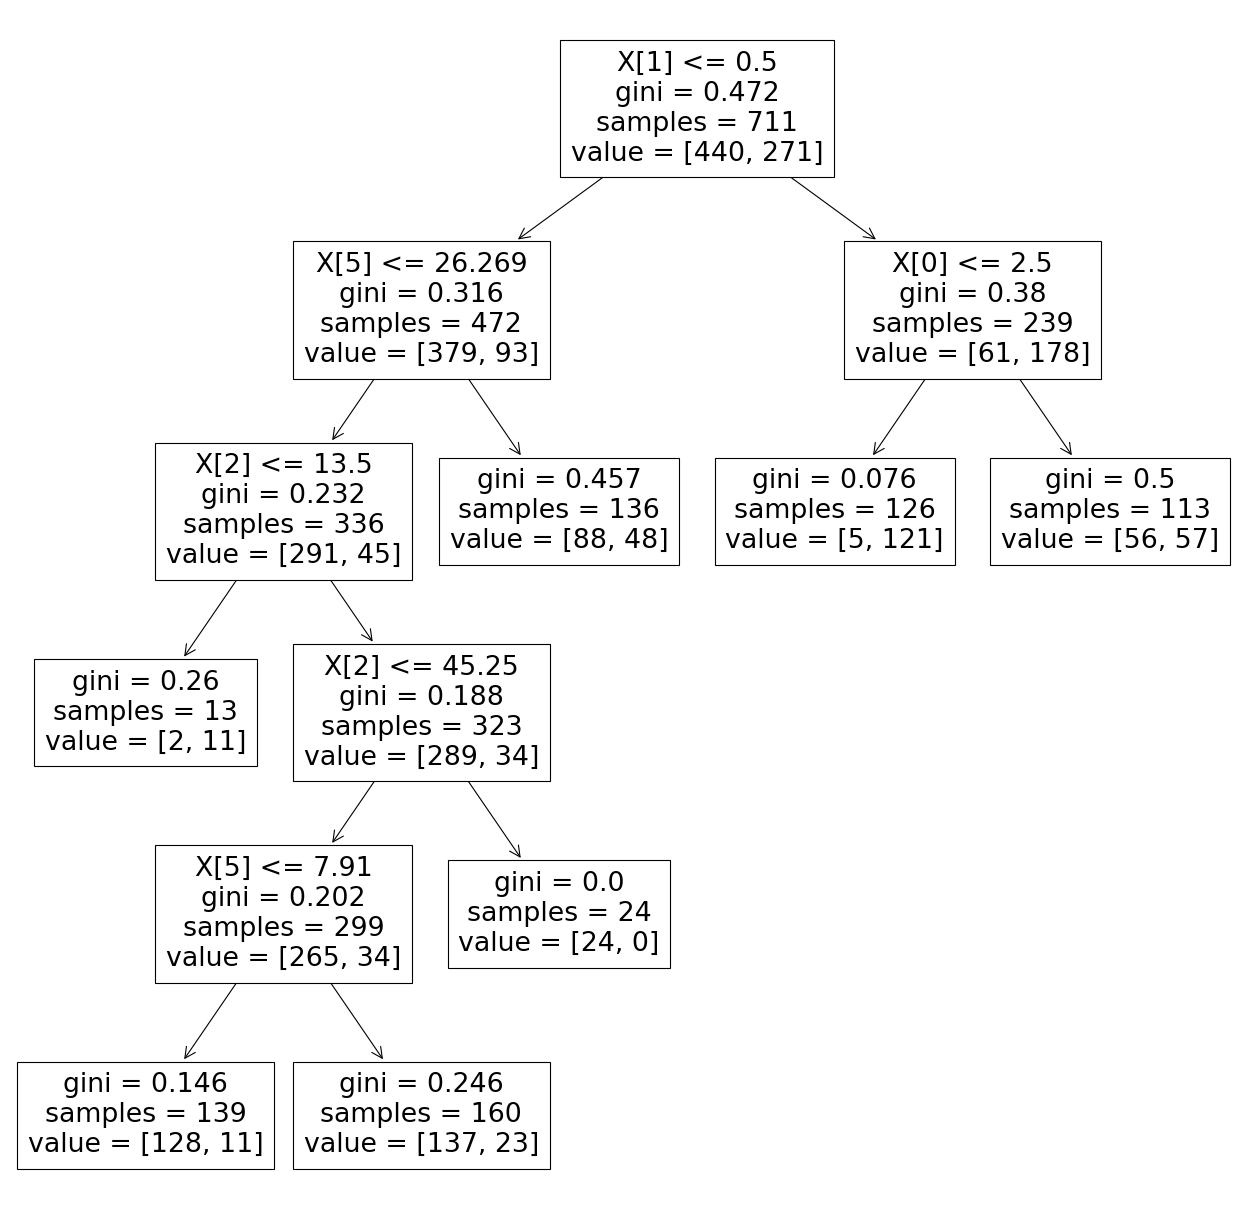

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_split = 200).fit(x_train, y_train)
print("Train accuracy: " + str(tree_model.score(x_train, y_train)))
print("Test accuracy: " + str(tree_model.score(x_test, y_test)))
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

           
plot_tree(tree_model)
plt.show()

We can also force the tree to only have a certain amount of leaf nodes:

Train accuracy: 0.810126582278481
Test accuracy: 0.8089887640449438


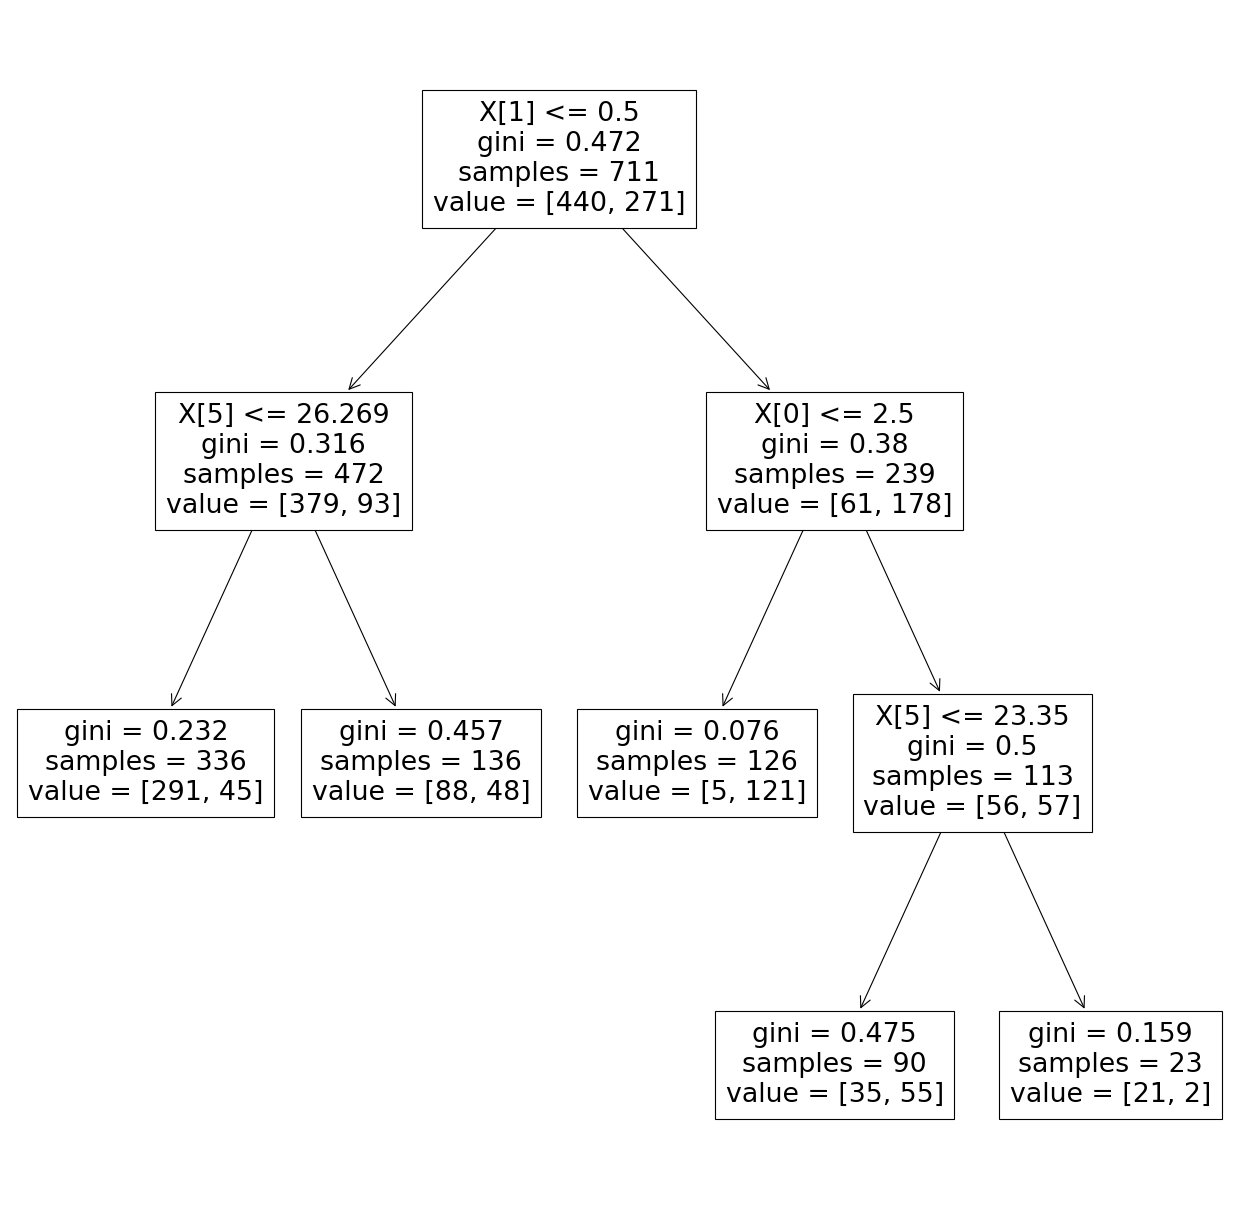

In [ ]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = 5).fit(x_train, y_train)

print("Train accuracy: " + str(tree_model.score(x_train, y_train)))
print("Test accuracy: " + str(tree_model.score(x_test, y_test)))
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

           
plot_tree(tree_model)
plt.show()

You may have noticed that our accuracy went down in pretty much every overfitting reduction technique we tried. Finding the best model is tough, that's the challenge of ML! It's likely that some combination of the above decision tree parameters produces the best model with reduced overfitting. There's even more parameters that you can tune for this model, check them out in Sklearn documentation here!

As a whole, decision trees are useful ML tools that can be simple and easy to visualize. What if we could combine the power of multiple decision trees into one model? Perhaps a forest of trees?

### Random Forest

Let's go back to our car example. The decision tree that we had there was only one person's idea of how they would buy their perfect car. Let's say one person's opinion is not enough for you. So, you decide to survey a ton of different people on how they would buy a car, and collect their "decision trees" as well. Now, the next time you try to buy a car, you look at what the majority of people's decision trees would do, and go with that result.

Essentially, what we're doing is we're taking the majority decision from the results of a bunch of decision trees, and using that as our decision.


Here's another example. What would our random forest output for a fruit of size 5 and green 1?

In [ ]:
img_url = "https://miro.medium.com/max/3744/1*ZCwZ-P17UVyVzhjHwjP_Mw.png"
Image(url=img_url)

Well, with size 5, our first tree would output strawberry. Because of green 1 and size 5, our second decision tree would output apple. And because of size 5, our third decision tree would output apple as well. Since we have two trees saying apple and one tree saying strawberry, our random forest decision would be apple!

So the key in Random Forests is being able to generate a plethora of different decision trees, and taking the majority value of their results.

Let's apply this to our titanic dataset now:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier().fit(x_train, y_train)
print("Train accuracy: " + str(forest_model.score(x_train, y_train)))
print("Test accuracy: " + str(forest_model.score(x_test, y_test)))

Train accuracy: 0.9845288326300985
Test accuracy: 0.7865168539325843


It's that simple!

Let's try to visualize all of the trees that our model is making its decisions based off of. To make sure our trees are not enormous, let's limit the depth of the trees, and reduce the number of trees created using the n_estimators parameter.

In [ ]:
forest_model = RandomForestClassifier(n_estimators = 4, max_depth = 3).fit(x_train, y_train)
print("Train accuracy: " + str(forest_model.score(x_train, y_train)))
print("Test accuracy: " + str(forest_model.score(x_test, y_test)))

Train accuracy: 0.8002812939521801
Test accuracy: 0.8033707865168539


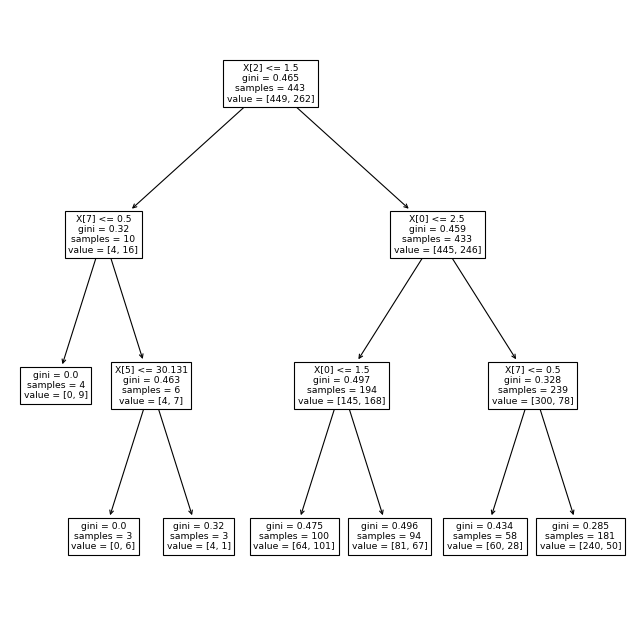

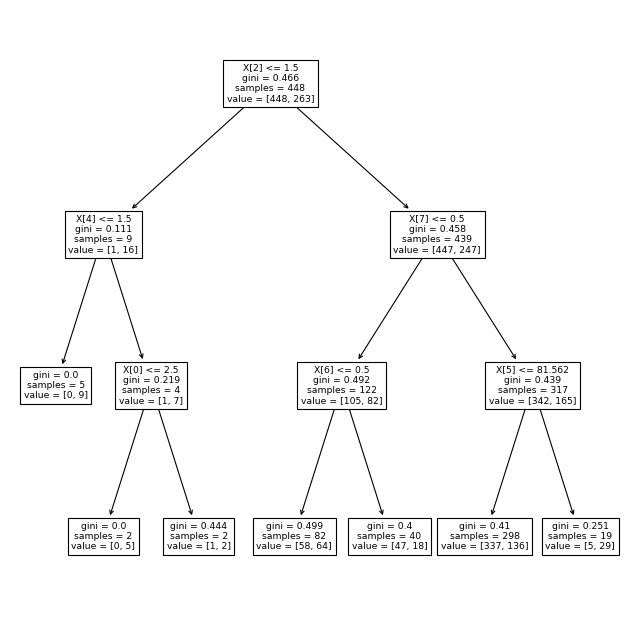

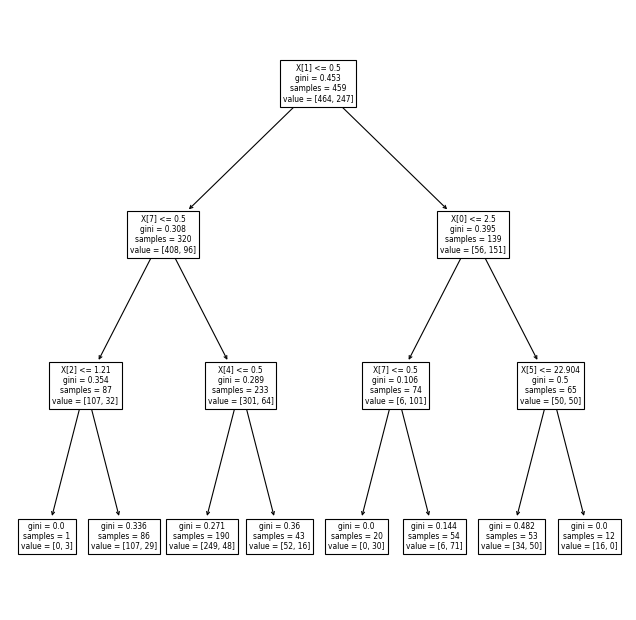

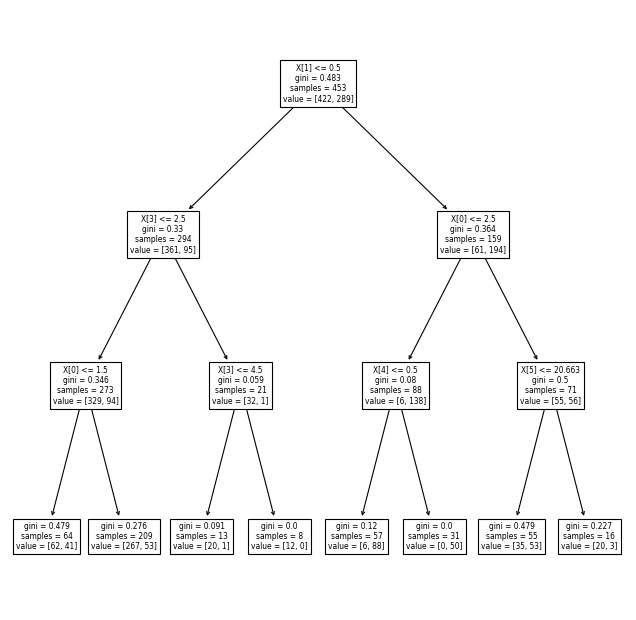

In [ ]:
for tree_in_forest in forest_model.estimators_:
    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plot_tree(tree_in_forest)
    plt.show()
           

Here, we've outputted the four trees the model is using to make its decisions! We will run each datapoint through each of these trees, and then take the majority value as our output.

You may be wondering how we create so many different trees using only one dataset. After all, aren't we running the same algorithm to create each decision tree? And with the same algorithm and the same data, shouldn't we get the same decision tree every time?

Well, you're completely right. With the same data and the same algo, we will get the same decision tree. Thus, to make different decision trees, we have to change the data, or at least change the data we're using to create the trees. Thus, for every tree, we randomly select some features (but not all) from the dataset to use to build the tree. For example, in our titanic dataset, our first tree may use Sex, Age, and parch, where another might use Age, Port_Q, and Port_S. We do this over and over until we have created n_estimator number of decision trees!

So that's a wrap on Decision Trees. Take some time to play around with the parameters and see what you can do with this model! Beware, don't let n_estimator get too big, or your model will take _forever_ to run.

### K Nearest Neighbors (To be covered next time)

K Nearest Neighbors is another ML algorithm that is very useful for classification tasks like ours! Let's say you're about to go vote in the upcoming Democratic Primaries, but don't know too much about the candidates. You decide to ask the five people near you who they are voting for. Three of these people say they are voting for Candidate A, and two say they are voting for Candidate B. You decide that since more people decided to vote for Candidate A, you will too. 

A K Nearest Neighbors model works in a similar way. We graph datapoints based on their features, and then for each data point, assign it the value of those nearest to it. Here's a visual example:

In [ ]:
img_url = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png"
Image(url=img_url)

Let's start with the assumption that our we are looking at the three nearest neighbors, so k is equal to three. In the graph on the top left, we have plotted the classified data we have, and have also placed the data point we want to classify in yellow. Next, in the top right graph, we measure the distance of our new data point to its nearest neighbors. In the bottom graph, we can see that of the three closest nearest neighbors to our new datapoint, two are Class B, and one is Class A. Since the majority of the three closest neigbors are Class B, we will label our new datapoint as Class B as well.

In [ ]:
img_url = "https://miro.medium.com/max/1300/0*Sk18h9op6uK9EpT8."
Image(url=img_url)

What would we classify our point in green if K=1? If K=3? K=8? K=20?

Let's implement KNN using scikit learn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(x_train, y_train)

print("Train accuracy: " + str(knn_model.score(x_train, y_train)))
print("Test accuracy: " + str(knn_model.score(x_test, y_test)))

We can change the number of neighbors we survey using sklearn's model with the n_neighbors parameter:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)

print("Train accuracy: " + str(knn_model.score(x_train, y_train)))
print("Test accuracy: " + str(knn_model.score(x_test, y_test)))

Hold up, what happened here? Our train accuracy is high, but our test accuracy is extremely low. Once again, this is an example of overfitting. Unfortuantely, if we don't have an adequate amount of data, a KNN is likely to overfit. This is called the curse of dimensionality.

In [ ]:
img_url = "https://www.visiondummy.com/wp-content/uploads/2014/04/dimensionality_vs_performance.png"
Image(url=img_url)

The curse of dimensionality essentially says that as we increase the number of features in our model, classifier performance will likely drop if we don't exponentially increase the amount of data. In our case, we've likely given the model too many features to handle.

Let's see what we can do about this. Let's reduce the number of features our model looks at and see if that helps.

In [ ]:
new_data = titanic_data.drop(columns = ["SibSp", "Fare", "port_Q", "port_S"])
new_data.head()


Now for our train test split, as per standard procedure:

In [ ]:
features = new_data.drop(columns = ["Survived"])
labels = new_data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

x_train.head()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
print("Train accuracy: " + str(knn_model.score(x_train, y_train)))
print("Test accuracy: " + str(knn_model.score(x_test, y_test)))

okay.....well that didn't really work. Perhaps we're choosing a poor value for n_neighbors. Let's try some parameter tuning! Here, we'll loop through different values of n_neighbors and see what works the best.

In [ ]:
n = [1, 3, 5, 11, 21, 51, 101, 601]

for a in n:
    knn_model = KNeighborsClassifier(n_neighbors = a).fit(x_train, y_train)
    print("Number of neighbors: " + str(a))
    print("Train accuracy: " + str(knn_model.score(x_train, y_train)))
    print("Test accuracy: " + str(knn_model.score(x_test, y_test)))
    print()

Clearly, there doesn't seem to be any value for n_neighbors that gives us good performance. No worries though! This just means that the KNN algorithm is not a good choice for our titanic dataset. This sort of trial and error is very common when you're just starting off in data science or machine learning.

That's all for today folks! Thanks for coming out! Please fill out our feedback form: [tinyurl.com/applymlfourfeedback](http://tinyurl.com/applymlfourfeedback)